<i> IC272: Data Science-III Assignment-6</i>
<br>
Roll No: B21118 <br>
Name: Riya Arora <br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg as AR

In [2]:
covid_df = pd.read_csv("daily_covid_cases.csv")
print(covid_df)
print()

covid_df['Date'] = pd.to_datetime(covid_df['Date'])
covid_df.set_index('Date', inplace = True)
print(covid_df)

           Date    new_cases
0    2020-01-30      0.00000
1    2020-01-31      0.00000
2    2020-02-01      0.33333
3    2020-02-02      0.50000
4    2020-02-03      0.60000
..          ...          ...
607  2021-09-28  26421.85714
608  2021-09-29  25222.71429
609  2021-09-30  24557.71429
610  2021-10-01  23806.00000
611  2021-10-02  23022.57143

[612 rows x 2 columns]

              new_cases
Date                   
2020-01-30      0.00000
2020-01-31      0.00000
2020-02-01      0.33333
2020-02-02      0.50000
2020-02-03      0.60000
...                 ...
2021-09-28  26421.85714
2021-09-29  25222.71429
2021-09-30  24557.71429
2021-10-01  23806.00000
2021-10-02  23022.57143

[612 rows x 1 columns]


### Question-1: Autocorrelation Line Plot with Lagged Values

<u> Part a. </u> <br>
Line Plot of Number of Cases datewise: depicting the first and second COVID-19 waves.    

<AxesSubplot:xlabel='Date'>

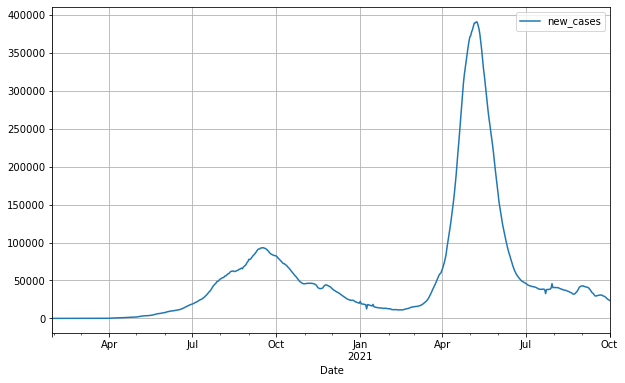

In [3]:
covid_df.plot(figsize = (10, 6), grid = True)

<u> Part b. </u> <br>
One-day time lag sequence and its Pearson Correlation Coefficient with the given time sequence.

In [4]:
one_lag = covid_df.shift(1)
print(one_lag)
print()

one_lag_non_na = one_lag.iloc[1:,:]
pearson_corr = np.corrcoef(covid_df.iloc[1:,:].new_cases, one_lag_non_na.new_cases)
print(pearson_corr)
print()

print("Pearson's Correlation Coefficient for given time sequence and one-day lagged sequence is", pearson_corr[0][1])
print()

              new_cases
Date                   
2020-01-30          NaN
2020-01-31      0.00000
2020-02-01      0.00000
2020-02-02      0.33333
2020-02-03      0.50000
...                 ...
2021-09-28  27578.14286
2021-09-29  26421.85714
2021-09-30  25222.71429
2021-10-01  24557.71429
2021-10-02  23806.00000

[612 rows x 1 columns]

[[1.         0.99906441]
 [0.99906441 1.        ]]

Pearson's Correlation Coefficient for given time sequence and one-day lagged sequence is 0.9990644144715031



<u> Part c. </u> <br>
Scatter plot between given time sequence and one-day lagged time sequence.

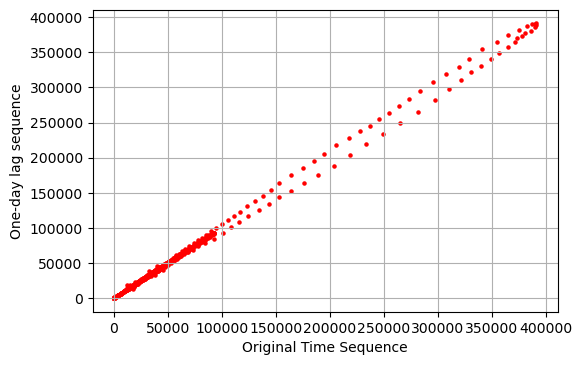

In [5]:
x_values = covid_df.iloc[1:,:].new_cases
y_values = one_lag_non_na.new_cases

plt.figure(figsize = (6, 4), dpi = 100)
plt.scatter(x_values, y_values, s = 5, c = 'r')
plt.grid()
plt.xlabel("Original Time Sequence")
plt.ylabel("One-day lag sequence")
plt.show()

<i> 'Given Time Sequence and One-day lagged time sequence are positively and highly correlated' </i>

<u> Part d. </u> <br>
Different Lag Values - Correlation Coefficients

In [6]:
pearson_correlations = {1: pearson_corr[0][1]}

for lag in range(2, 7):
    lag_df = covid_df.shift(lag)

    lag_df_non_na = lag_df.iloc[lag:,:]
    pearson_corr = np.corrcoef(covid_df.iloc[lag:,:].new_cases, lag_df_non_na.new_cases)
    
    pearson_correlations[lag] = pearson_corr[0][1]
    
print("Pearson Correlation Coefficients for different lag values are: ")
print(pearson_correlations)

Pearson Correlation Coefficients for different lag values are: 
{1: 0.9990644144715031, 2: 0.9963751074839362, 3: 0.9919388573086093, 4: 0.9857861789952965, 5: 0.9779675657688203, 6: 0.9685303994656104}


In [7]:
x_values = []
y_values = []

for k in pearson_correlations:
    x_values.append(k)
    y_values.append(pearson_correlations[k])

print(x_values)
print(y_values)

[1, 2, 3, 4, 5, 6]
[0.9990644144715031, 0.9963751074839362, 0.9919388573086093, 0.9857861789952965, 0.9779675657688203, 0.9685303994656104]


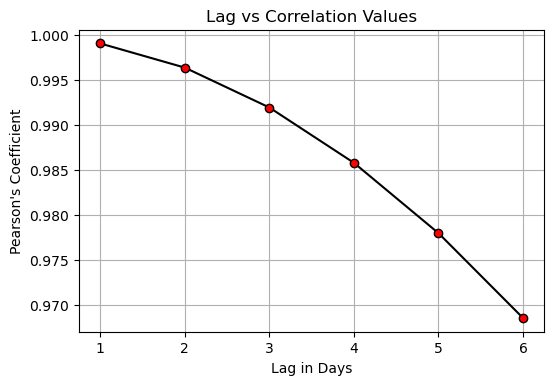

In [8]:
plt.figure(figsize = (6, 4), dpi = 100)

plt.plot(x_values, y_values, color = 'k', marker = 'o', markerfacecolor = 'r')
plt.title("Lag vs Correlation Values")
plt.xlabel("Lag in Days")
plt.ylabel("Pearson's Coefficient")
plt.grid()
plt.show()

<u> Part e. </u> <br>
Correlogram using Auto Correlation Function

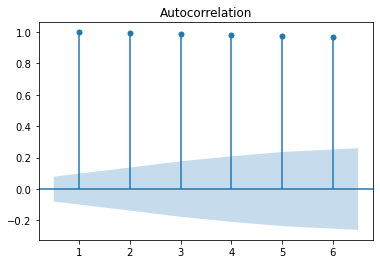

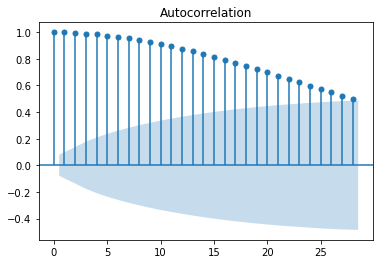

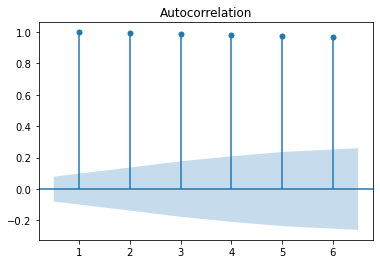

In [9]:
plot_acf(covid_df.new_cases)
plot_acf(covid_df.new_cases, lags = x_values)

### Question-2: Autoregression Model - Time Series Prediction

<u> Part a. </u> <br>
-> Splitting the dataset into train and test data and plot them.
<br>
-> Training AR Model with lag = 5.

In [10]:
# Train-Test split
test_fraction = 0.35
test_size = math.ceil(len(covid_df)*test_fraction)
train_df, test_df = covid_df[:len(covid_df)-test_size], covid_df[len(covid_df)-test_size:]

print(train_df)
print()
print(test_df)

              new_cases
Date                   
2020-01-30      0.00000
2020-01-31      0.00000
2020-02-01      0.33333
2020-02-02      0.50000
2020-02-03      0.60000
...                 ...
2021-02-25  14299.57143
2021-02-26  14656.00000
2021-02-27  15011.42857
2021-02-28  15198.71429
2021-03-01  15441.85714

[397 rows x 1 columns]

              new_cases
Date                   
2021-03-02  15620.00000
2021-03-03  15715.57143
2021-03-04  15752.85714
2021-03-05  16009.42857
2021-03-06  16295.42857
...                 ...
2021-09-28  26421.85714
2021-09-29  25222.71429
2021-09-30  24557.71429
2021-10-01  23806.00000
2021-10-02  23022.57143

[215 rows x 1 columns]


<AxesSubplot:xlabel='Date'>

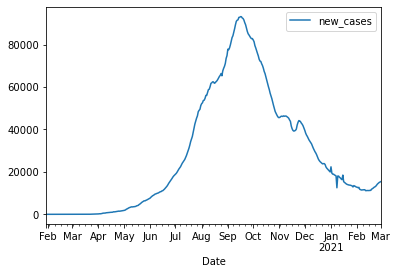

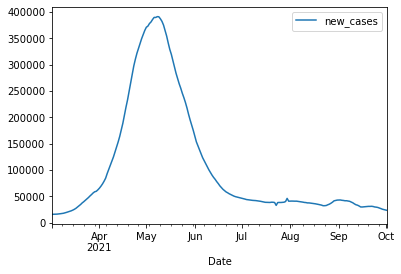

In [11]:
# Plotting the test and train data

train_df.plot()
test_df.plot()

In [12]:
# Training the model
p = 5
model = AR(train_df, lags = p)
model_fit = model.fit()
coef = model_fit.params

print(coef)

intercept       59.954833
new_cases.L1     1.036759
new_cases.L2     0.261712
new_cases.L3     0.027561
new_cases.L4    -0.175392
new_cases.L5    -0.152461
dtype: float64


C:\Users\Riya Arora\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Riya Arora\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [13]:
forecasts = model.forecast(50)
test_values = df_test.tolist()

plt.figure(figsize = (6, 4), dpi = 100)
plt.plot(test_df.index, test_df.new_cases, label = 'Actual Cases')
plt.plot(test_df.index, test_values, label = 'Predicted Cases')


AttributeError: 'AutoReg' object has no attribute 'forecast'

<u> Part b. </u> <br>
-> Predicting Time Series.
<br>
-> Scatter plot between actual and predicted values.
<br>
-> Line plot showing actual and predicted values.
<br>
-> RMSE and MAPE between actual and predicted data.

In [ ]:
# Time-Series Prediction

history = train_df[(len(train_df)-p):]
history = [history.iloc[i].new_cases for i in range(len(history))]
predictions = []
print(history)


# Loop runs as many times as number of predictions needed
for t in range(len(test_df)):
    length = len(history)
    lag = [history[i] for i in range(length-p, length)]
    pred_val = coef[0] # coef[0] is w0
    for d in range(p):
        pred_val+= coef[d+1] * lag[-(d+1)]
    predictions.append(pred_val)
    obs = test_df.iloc[t].new_cases
    history.append(obs)
    
print(len(predictions))

In [ ]:
# Scatter plot between actual and predicted values

plt.scatter(test_df.new_cases, predictions, c = 'r', edgecolor = 'k')
plt.title("Scatter Plot between Actual and predicted data")
plt.xlabel("Actual Covid Cases")
plt.ylabel("Predicted Covid Cases")
plt.grid()
plt.show()

In [ ]:
# Line Plot showing Actual and Predicted test values.

plt.figure(figsize = (6, 4), dpi = 100)
plt.plot(test_df.index, test_df.new_cases, label = 'Actual Cases')
plt.plot(test_df.index, predictions, label = 'Predicted Cases')
